In [ ]:
direc = r"/content/drive/MyDrive/FYP/ANN3/"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# 1. Load the data
data = pd.read_csv(direc + "Dataset/FinalCN_Dataset.csv")

# 2. Separate features and labels.
#    Assume the first 53 columns are features and the last column is the class name.
X = data.iloc[:, :-1].values  # features (53 columns)
y = data.iloc[:, -1].values   # class labels

# 3. Encode the class labels (direct classification with existing 10 classes)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print the mapping from class names to numeric codes
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# 4. Split the data: 80% training and 20% test.
#    Use stratify to keep class distribution similar.
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y_encoded, test_size=0.50, stratify=y_encoded, shuffle=True, random_state=42
)

# 5. Further split the training data into training and validation sets (70% train, 30% validation of the training set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.50, stratify=y_train_full, shuffle=True, random_state=42
)

# 6. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# 7. Save the scaler to a file for future use (using joblib)
joblib.dump(scaler, direc + "Preprocessing/scaler.pkl")

# 8. Save the preprocessed data as .npy files
np.save(direc + "Preprocessing/X_train_scaled.npy", X_train_scaled)
np.save(direc + "Preprocessing/y_train.npy", y_train)
np.save(direc + "Preprocessing/X_val_scaled.npy", X_val_scaled)
np.save(direc + "Preprocessing/y_val.npy", y_val)
np.save(direc + "Preprocessing/X_test_scaled.npy", X_test_scaled)
np.save(direc + "Preprocessing/y_test.npy", y_test)

print("Preprocessing complete. Scaler and preprocessed data have been saved.")


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes ': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (brain hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}
Preprocessing complete. Scaler and preprocessed data have been saved.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define the input layer: shape=(53,) because there are 53 binary feature inputs.
input_layer = Input(shape=(53,), name="input_layer")

# First hidden layer: 128 neurons, ReLU activation.
x = Dense(16, activation='relu', name="dense_1")(input_layer)
x = Dropout(0.2, name="dropout_1")(x)

# Second hidden layer: 64 neurons, ReLU activation.
x = Dense(16, activation='relu', name="dense_2")(x)
x = Dropout(0.2, name="dropout_2")(x)

# Third hidden layer: 32 neurons, ReLU activation.
x = Dense(16, activation='relu', name="dense_3")(x)
x = Dropout(0.2, name="dropout_3")(x)

# Output layer: 10 neurons (for the 10 classes) with softmax activation.
output_layer = Dense(10, activation='softmax', name="output_layer")(x)

# Build the model using the Functional API.
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model:
# - Optimizer: Adam (a robust choice for many tasks)
# - Loss: sparse_categorical_crossentropy (since labels are integer encoded)
# - Metrics: accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary to review the architecture.
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 53)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578 (6.16 KB)

 Trainable params: 1,578 (6.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4310 - loss: 1.5856 - val_accuracy: 0.9958 - val_loss: 0.0942
Epoch 2/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8684 - loss: 0.4060 - val_accuracy: 0.9990 - val_loss: 0.0227
Epoch 3/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9136 - loss: 0.2670 - val_accuracy: 0.9995 - val_loss: 0.0108
Epoch 4/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9330 - loss: 0.2155 - val_accuracy: 0.9998 - val_loss: 0.0074
Epoch 5/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9389 - loss: 0.2006 - val_accuracy: 0.9999 - val_loss: 0.0062
Epoch 6/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9455 - loss: 0.1803 - val_accuracy: 0.9999 - val_loss: 0.0046
Epoch 7/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9505 - loss: 0.1701 - val_accuracy: 0.9999 - val_loss: 0.0040
Epoch 8/10
851/851 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9547 - loss: 0.1559 - val_accuracy: 

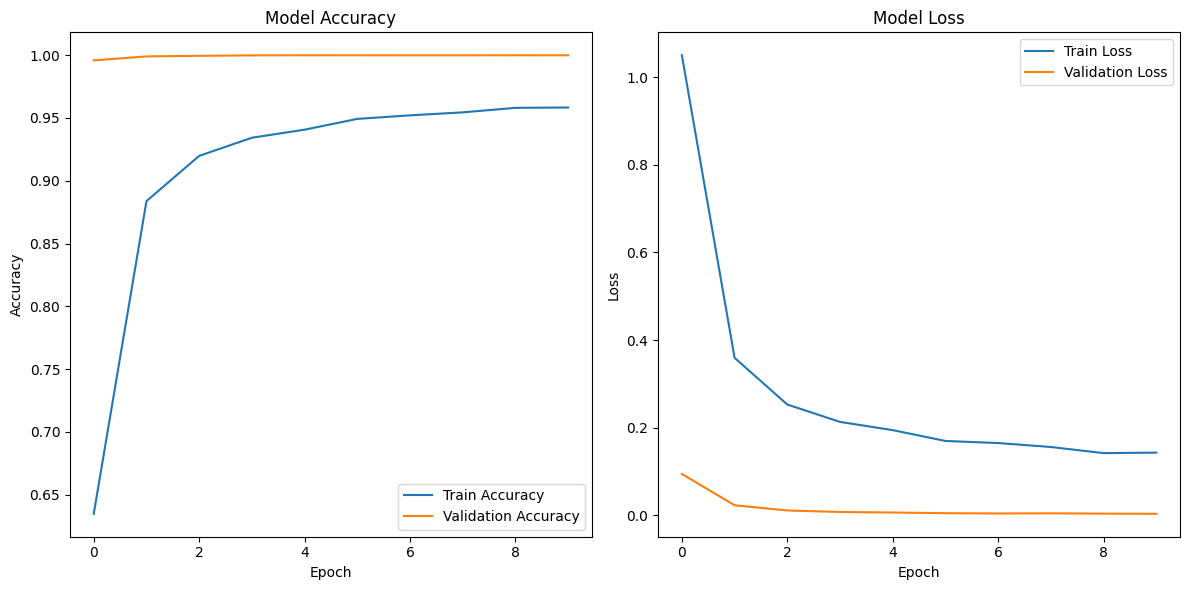

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger



# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_scaled, y_val)

)

# Save the final (normal) model after training
model.save(direc + 'Training/final_model.keras')

# Plot the training history: Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(direc + 'Training/training_plots.png')
plt.show()


In [ ]:
#import numpy as np
#from tensorflow.keras.models import load_model

#X_test_scaled = np.load(direc + "Preprocessing/X_test_scaled.npy")
#y_test = np.load(direc + "Preprocessing/y_test.npy")
#model = load_model(direc +'Training/final_model.keras')

3404/3404 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Test Accuracy: 0.9999
Classification report saved as: /content/drive/MyDrive/FYP/ANN3/Testing/classification_report.csv


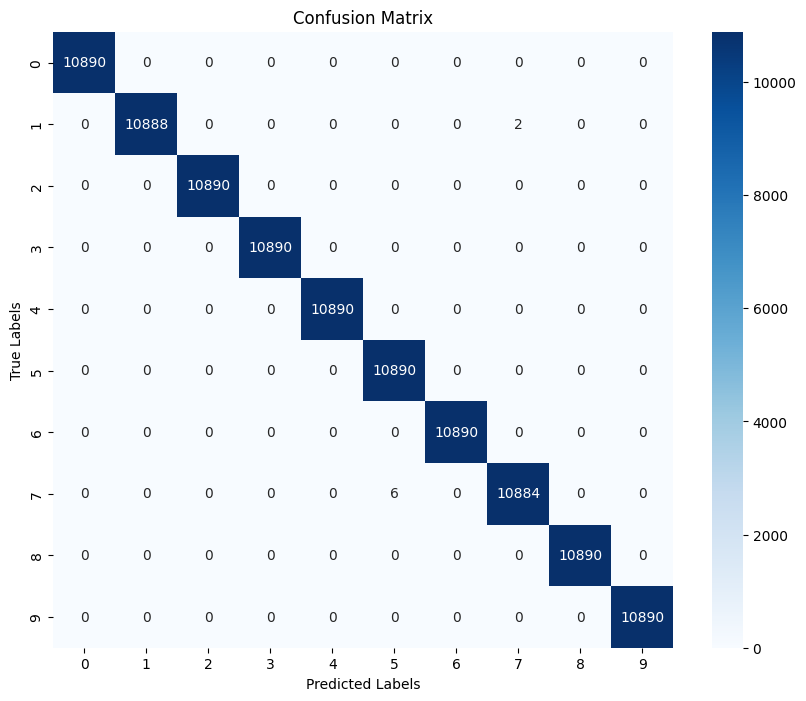

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/ANN3/Testing/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set using the trained model.
predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate the classification report and convert it to a DataFrame.
report = classification_report(y_test, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file.
report_csv_path = direc + 'Testing/classification_report.csv'
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix.
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix using seaborn.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file.
cm_png_path = direc + 'Testing/confusion_matrix.png'
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import joblib
from tensorflow.keras.models import load_model

direc = r"/content/drive/MyDrive/FYP/ANN3/"
# --- Load the saved components ---
# Update these file paths as necessary.
scaler = joblib.load(direc + 'Preprocessing/scaler.pkl')
model = load_model(direc +'Training/final_model.keras')

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import time

# Define the list of symptoms in a fixed order
symptoms_list = [
    "itching", "skin_rash", "continuous_sneezing", "shivering", "chills", "joint_pain",
    "acidity", "vomiting", "fatigue", "weight_loss", "restlessness", "lethargy",
    "irregular_sugar_level", "cough", "high_fever", "breathlessness", "sweating", "indigestion",
    "headache", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain",
    "constipation", "abdominal_pain", "diarrhoea", "mild_fever", "swelled_lymph_nodes",
    "malaise", "blurred_and_distorted_vision", "phlegm", "chest_pain", "fast_heart_rate",
    "obesity", "excessive_hunger", "muscle_weakness", "stiff_neck", "swelling_joints",
    "movement_stiffness", "weakness_of_one_body_side", "toxic_look_(typhos)", "depression",
    "irritability", "muscle_pain", "altered_sensorium", "red_spots_over_body", "belly_pain",
    "watering_from_eyes", "increased_appetite", "polyuria", "rusty_sputum", "visual_disturbances",
    "painful_walking"
]

# UI Elements
symptom_selector = widgets.Select(
    options=symptoms_list,
    description="Select",
    layout=widgets.Layout(width="50%")
)
selected_symptoms_display = widgets.Output()
output_display = widgets.Output()

add_button = widgets.Button(description="Add Symptom")
remove_button = widgets.Button(description="Remove Last")
generate_button = widgets.Button(description="Generate Input")

# Store Selected Symptoms
selected_symptoms = set()  # Use a set to prevent duplicates

# Function to add a symptom
def add_symptom(b):
    symptom = symptom_selector.value
    if symptom and symptom not in selected_symptoms:
        selected_symptoms.add(symptom)
        update_selected_display()

# Function to remove the last selected symptom
def remove_last_symptom(b):
    if selected_symptoms:
        selected_symptoms.remove(next(iter(selected_symptoms)))  # Remove the first symptom
        update_selected_display()

# Function to update the selected symptoms display
def update_selected_display():
    with selected_symptoms_display:
        selected_symptoms_display.clear_output(wait=True)  # Use `wait=True` to prevent flickering
        print("Selected Symptoms:", ", ".join(selected_symptoms))

# Function to generate the binary input
def generate_input_data(b):
    binary_values = [1 if symptom in selected_symptoms else 0 for symptom in symptoms_list]
    binary_string = ",".join(map(str, binary_values))
    with output_display:
        output_display.clear_output(wait=True)
        print("Binary Input for Model:")
        print(binary_string)

# Link buttons to functions
add_button.on_click(add_symptom)
remove_button.on_click(remove_last_symptom)
generate_button.on_click(generate_input_data)

# Display widgets
display(symptom_selector, add_button, remove_button, selected_symptoms_display, generate_button, output_display)


Select(description='Select', layout=Layout(width='50%'), options=('itching', 'skin_rash', 'continuous_sneezing…

Button(description='Add Symptom', style=ButtonStyle())

Button(description='Remove Last', style=ButtonStyle())

Output()

Button(description='Generate Input', style=ButtonStyle())

Output()

In [ ]:
# Prompt the user to enter 53 binary values separated by commas.
input_str = input("Enter 53 binary values (0 or 1) separated by commas: ")

# Convert the input string into a list of integers.
try:
    input_list = [int(x.strip()) for x in input_str.split(',')]
except ValueError:
    print("Error: Please enter only numeric values (0 or 1).")
    exit()

# Check that exactly 53 values were provided.
if len(input_list) != 53:
    print("Error: You must enter exactly 53 values.")
    exit()

# Convert the list into a numpy array and reshape to (1, 53) for a single sample.
input_array = np.array(input_list).reshape(1, -1)

# --- Preprocess the input (scale it) ---
input_scaled = scaler.transform(input_array)

# For an ANN (dense network), no additional reshaping is needed.
# If the model expects shape (batch_size, 53), input_scaled is already correct.

# --- Make predictions ---
predictions = model.predict(input_scaled)  # Predictions shape will be (1, 10)

# For multi-class classification with softmax, use argmax to get the predicted class.
predicted_class = np.argmax(predictions, axis=1)[0]
max_prob = np.max(predictions)

# Set a threshold for prediction confidence. (Note: In multi-class problems, thresholds are less common,
# but you can use one to flag uncertain predictions.)
threshold = 0.95

if max_prob < threshold:
    print("Prediction is not confident.The disease might not be in my database. Maximum probability: {:.2f}".format(max_prob))
else:
    print("Predicted class: {} with probability: {:.2f}".format(predicted_class, max_prob))


Enter 53 binary values (0 or 1) separated by commas: 1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Predicted class: 0 with probability: 1.00


'Allergic Reaction'= 0  
'Arthritis'= 1  
'Chickenpox'= 2     
'Dengue'= 3   
'Diabetes '= 4    
'Malaria'= 5    
'Migraine'= 6   
'Paralysis (brain hemorrhage)'= 7   
'Pneumonia'= 8    
'Typhoid'= 9    

Preprocessing and Testing on Combination of Newly Collected Data

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Path to the directory
direc = r"/content/drive/MyDrive/FYP/ANN3/"

# 1. Load the new CSV test data
new_data = pd.read_csv(direc + "New Test/Test_Dataset.csv")

# 2. Separate features (first 53 columns) and labels (last column)
X_new = new_data.iloc[:, :-1].values  # Features (53 columns)
y_new = new_data.iloc[:, -1].values   # Class labels

# 3. Load the previously saved scaler
scaler = joblib.load(direc + 'Preprocessing/scaler.pkl')

# 4. Standardize the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# 5. Encode the class labels using LabelEncoder (since you only have scaler.pkl, need to encode labels)
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# 6. Print the class labels and their corresponding numeric encoding
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# Return the preprocessed data and encoded labels
X_new_scaled, y_new_encoded


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (Brain Hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}


(array([[-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [ 1.58050893,  1.48156928,  1.79160111, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        ...,
        [ 1.58050893,  1.48156928,  1.79160111, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [ 1.58050893,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165]]),
 array([9, 0, 9, ..., 0, 4, 2]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9909
Classification report saved as: /content/drive/MyDrive/FYP/ANN3/New Test/classification_report.csv


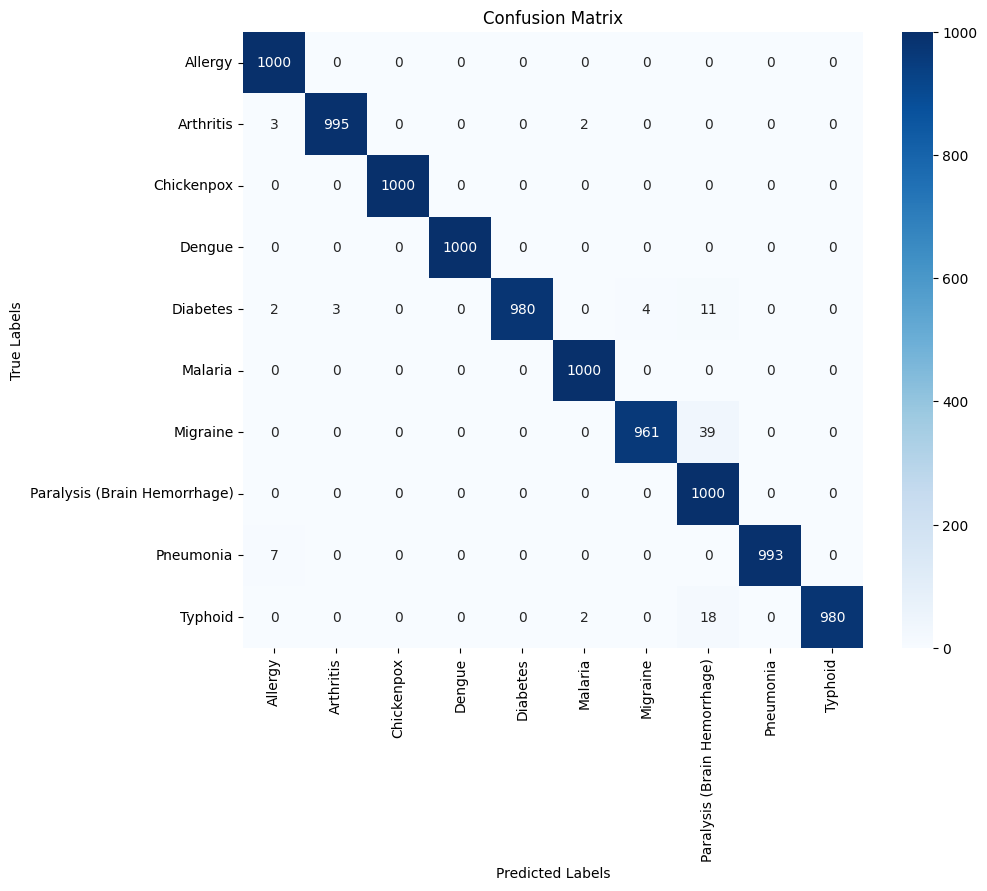

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/ANN3/New Test/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model

# Path to the directory
direc = r"/content/drive/MyDrive/FYP/ANN3/"

# Load the trained model
model = load_model(direc + 'Training/final_model.keras')

# Assuming that you have preprocessed X_new_scaled and y_new_encoded from the previous step
# Make predictions using the trained model
predictions = model.predict(X_new_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy score on the new data
test_accuracy = accuracy_score(y_new_encoded, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate classification report (CF) and convert it to a DataFrame
report = classification_report(y_new_encoded, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file
report_csv_path = direc + "New Test/classification_report.csv"
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix (CM)
cm = confusion_matrix(y_new_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file
cm_png_path = direc + "New Test/confusion_matrix.png"
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import joblib
from tensorflow.keras.models import load_model

direct = r"/content/drive/MyDrive/FYP/ANN3/"
# --- Load the saved components ---
# Update these file paths as necessary.
scaler = joblib.load(direct + 'Preprocessing/scaler.pkl')
model = load_model(direct +'Training/final_model.keras')

direc = r"/content/drive/MyDrive/FYP/Test Datasets/"


WHO Data

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# 1. Load the new CSV test data
new_data = pd.read_csv(direc + "WHO/WHO_Dataset.csv")

# 2. Separate features (first 53 columns) and labels (last column)
X_new = new_data.iloc[:, :-1].values  # Features (53 columns)
y_new = new_data.iloc[:, -1].values   # Class labels

# 3. Load the previously saved scaler
scaler = joblib.load(direct + 'Preprocessing/scaler.pkl')

# 4. Standardize the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# 5. Encode the class labels using LabelEncoder (since you only have scaler.pkl, need to encode labels)
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# 6. Print the class labels and their corresponding numeric encoding
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# Return the preprocessed data and encoded labels
X_new_scaled, y_new_encoded


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (Brain Hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}


(array([[-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        ...,
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165]]),
 array([9, 1, 5, ..., 9, 7, 1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Accuracy: 0.9387
Classification report saved as: /content/drive/MyDrive/FYP/Test Datasets/WHO/classification_report.csv


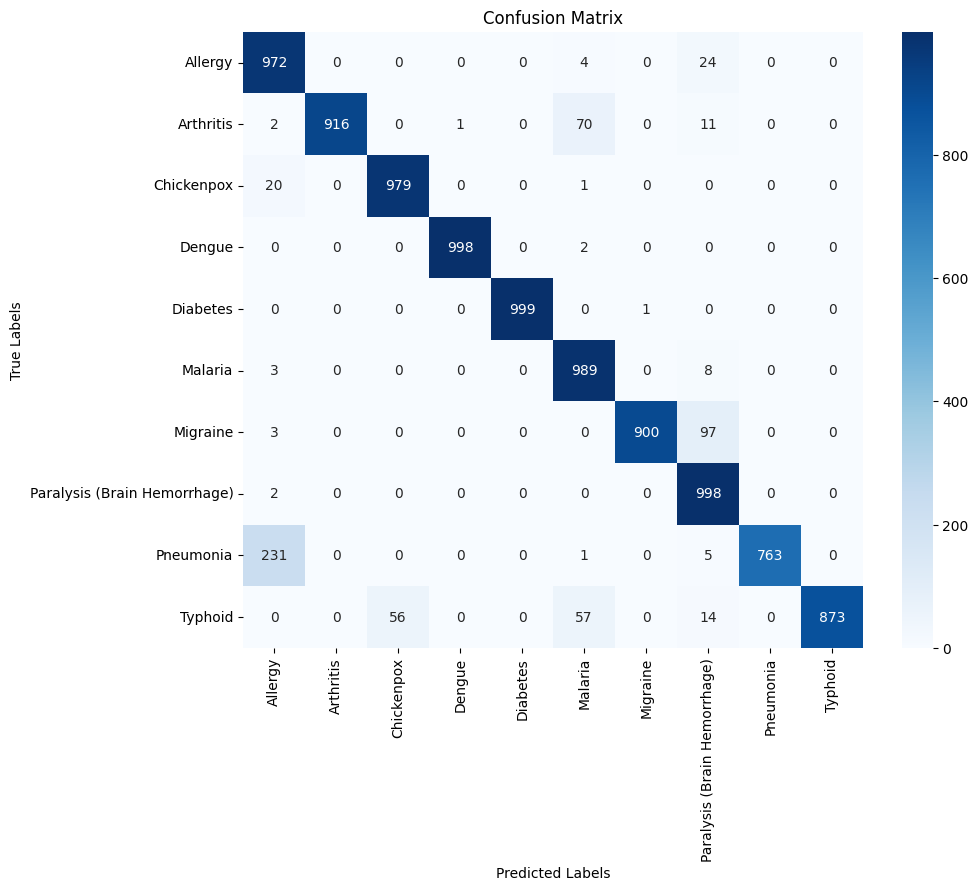

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/Test Datasets/WHO/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model


# Assuming that you have preprocessed X_new_scaled and y_new_encoded from the previous step
# Make predictions using the trained model
predictions = model.predict(X_new_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy score on the new data
test_accuracy = accuracy_score(y_new_encoded, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate classification report (CF) and convert it to a DataFrame
report = classification_report(y_new_encoded, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file
report_csv_path = direc + "WHO/classification_report.csv"
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix (CM)
cm = confusion_matrix(y_new_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file
cm_png_path = direc + "WHO/confusion_matrix.png"
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")


Cleave land Clinic

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# 1. Load the new CSV test data
new_data = pd.read_csv(direc + "Cleave land Clinic/Cleave_land_Clinic_Dataset.csv")

# 2. Separate features (first 53 columns) and labels (last column)
X_new = new_data.iloc[:, :-1].values  # Features (53 columns)
y_new = new_data.iloc[:, -1].values   # Class labels

# 3. Load the previously saved scaler
scaler = joblib.load(direct + 'Preprocessing/scaler.pkl')

# 4. Standardize the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# 5. Encode the class labels using LabelEncoder (since you only have scaler.pkl, need to encode labels)
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# 6. Print the class labels and their corresponding numeric encoding
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# Return the preprocessed data and encoded labels
X_new_scaled, y_new_encoded


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (Brain Hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}


(array([[-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        ...,
        [-0.63270759, -0.67496   , -0.55815996, ...,  2.00206847,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165]]),
 array([1, 3, 3, ..., 8, 4, 7]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy: 0.8624
Classification report saved as: /content/drive/MyDrive/FYP/Test Datasets/Cleave land Clinic/classification_report.csv


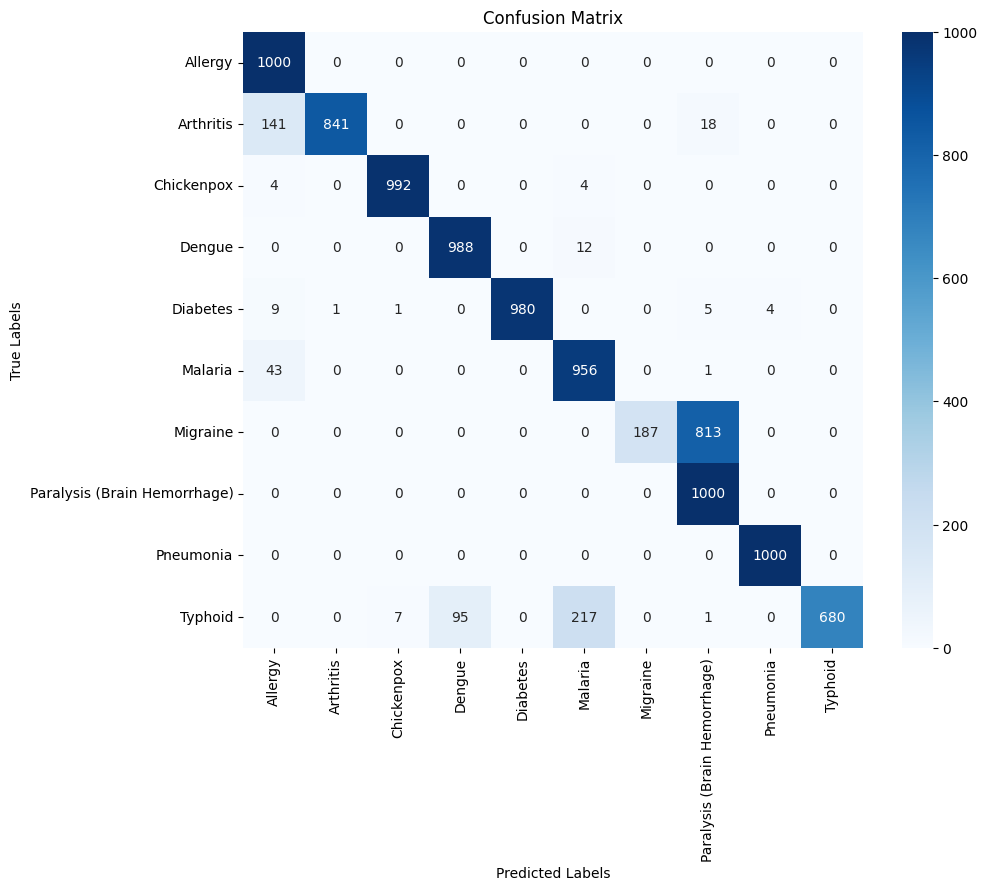

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/Test Datasets/Cleave land Clinic/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model


# Assuming that you have preprocessed X_new_scaled and y_new_encoded from the previous step
# Make predictions using the trained model
predictions = model.predict(X_new_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy score on the new data
test_accuracy = accuracy_score(y_new_encoded, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate classification report (CF) and convert it to a DataFrame
report = classification_report(y_new_encoded, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file
report_csv_path = direc + "Cleave land Clinic/classification_report.csv"
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix (CM)
cm = confusion_matrix(y_new_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file
cm_png_path = direc + "Cleave land Clinic/confusion_matrix.png"
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")




>CDC


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# 1. Load the new CSV test data
new_data = pd.read_csv(direc + "CDC/CDC_Dataset.csv")

# 2. Separate features (first 53 columns) and labels (last column)
X_new = new_data.iloc[:, :-1].values  # Features (53 columns)
y_new = new_data.iloc[:, -1].values   # Class labels

# 3. Load the previously saved scaler
scaler = joblib.load(direct + 'Preprocessing/scaler.pkl')

# 4. Standardize the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# 5. Encode the class labels using LabelEncoder (since you only have scaler.pkl, need to encode labels)
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# 6. Print the class labels and their corresponding numeric encoding
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# Return the preprocessed data and encoded labels
X_new_scaled, y_new_encoded


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (Brain Hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}


(array([[-0.63270759, -0.67496   , -0.55815996, ...,  2.00206847,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        ...,
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [ 1.58050893,  1.48156928,  1.79160111, ..., -0.49948342,
         -0.59119309, -0.54737165]]),
 array([8, 7, 3, ..., 9, 5, 0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9430
Classification report saved as: /content/drive/MyDrive/FYP/Test Datasets/CDC/classification_report.csv


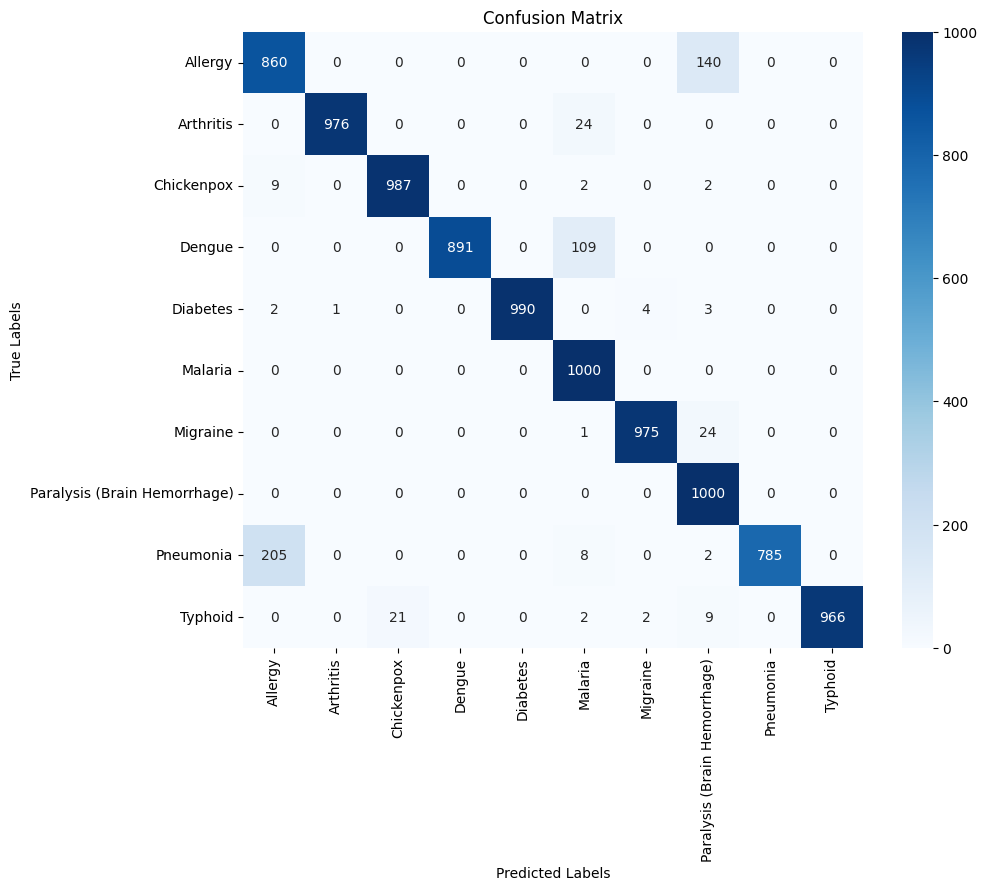

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/Test Datasets/CDC/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model


# Assuming that you have preprocessed X_new_scaled and y_new_encoded from the previous step
# Make predictions using the trained model
predictions = model.predict(X_new_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy score on the new data
test_accuracy = accuracy_score(y_new_encoded, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate classification report (CF) and convert it to a DataFrame
report = classification_report(y_new_encoded, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file
report_csv_path = direc + "CDC/classification_report.csv"
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix (CM)
cm = confusion_matrix(y_new_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file
cm_png_path = direc + "CDC/confusion_matrix.png"
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")


Medlineplus



In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# 1. Load the new CSV test data
new_data = pd.read_csv(direc + "Medlineplus/Medlineplus_Dataset.csv")

# 2. Separate features (first 53 columns) and labels (last column)
X_new = new_data.iloc[:, :-1].values  # Features (53 columns)
y_new = new_data.iloc[:, -1].values   # Class labels

# 3. Load the previously saved scaler
scaler = joblib.load(direct + 'Preprocessing/scaler.pkl')

# 4. Standardize the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# 5. Encode the class labels using LabelEncoder (since you only have scaler.pkl, need to encode labels)
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# 6. Print the class labels and their corresponding numeric encoding
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# Return the preprocessed data and encoded labels
X_new_scaled, y_new_encoded


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (Brain Hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}


(array([[-0.63270759, -0.67496   , -0.55815996, ...,  2.00206847,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        ...,
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165]]),
 array([8, 5, 2, ..., 5, 4, 2]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.8693
Classification report saved as: /content/drive/MyDrive/FYP/Test Datasets/Medlineplus/classification_report.csv


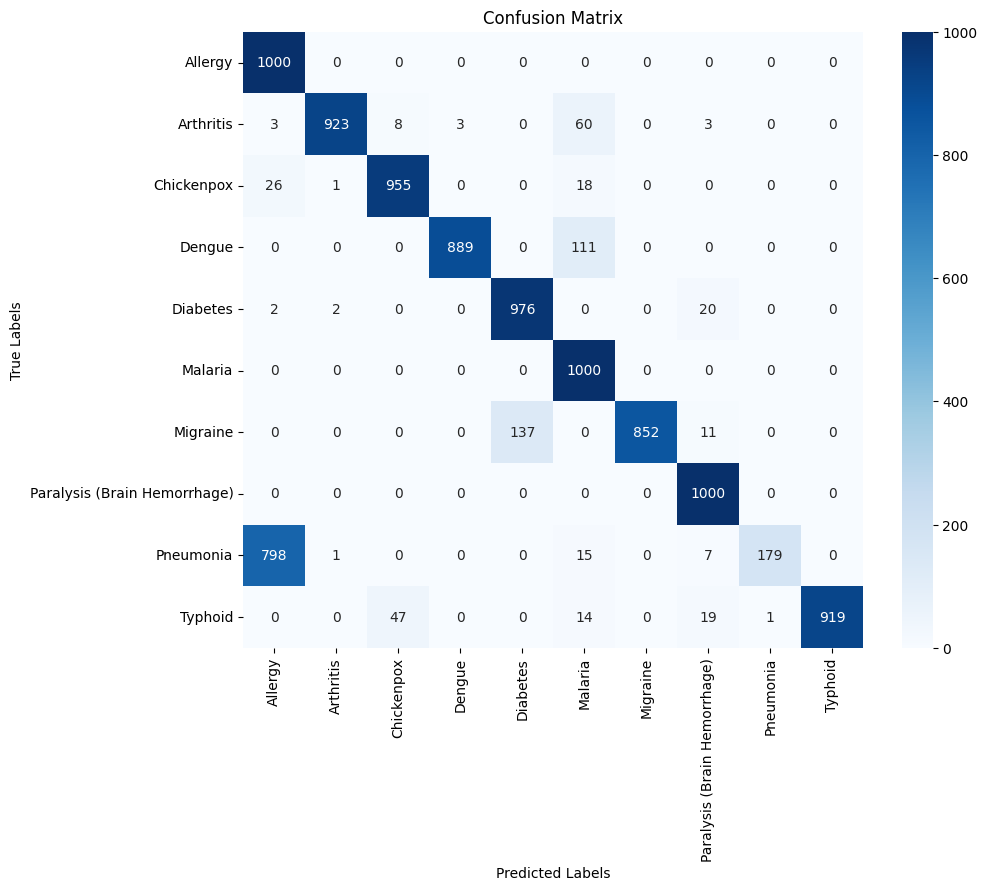

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/Test Datasets/Medlineplus/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model


# Assuming that you have preprocessed X_new_scaled and y_new_encoded from the previous step
# Make predictions using the trained model
predictions = model.predict(X_new_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy score on the new data
test_accuracy = accuracy_score(y_new_encoded, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate classification report (CF) and convert it to a DataFrame
report = classification_report(y_new_encoded, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file
report_csv_path = direc + "Medlineplus/classification_report.csv"
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix (CM)
cm = confusion_matrix(y_new_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file
cm_png_path = direc + "Medlineplus/confusion_matrix.png"
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")


Mayo Clinic

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# 1. Load the new CSV test data
new_data = pd.read_csv(direc + "Mayo Clinic/Mayo_Clinic_Dataset.csv")

# 2. Separate features (first 53 columns) and labels (last column)
X_new = new_data.iloc[:, :-1].values  # Features (53 columns)
y_new = new_data.iloc[:, -1].values   # Class labels

# 3. Load the previously saved scaler
scaler = joblib.load(direct + 'Preprocessing/scaler.pkl')

# 4. Standardize the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# 5. Encode the class labels using LabelEncoder (since you only have scaler.pkl, need to encode labels)
label_encoder = LabelEncoder()
y_new_encoded = label_encoder.fit_transform(y_new)

# 6. Print the class labels and their corresponding numeric encoding
class_mapping = {cls: idx for idx, cls in enumerate(label_encoder.classes_)}
print("Class mapping (class name -> numeric code):")
print(class_mapping)

# Return the preprocessed data and encoded labels
X_new_scaled, y_new_encoded


Class mapping (class name -> numeric code):
{'Allergy': 0, 'Arthritis': 1, 'Chickenpox': 2, 'Dengue': 3, 'Diabetes': 4, 'Malaria': 5, 'Migraine': 6, 'Paralysis (Brain Hemorrhage)': 7, 'Pneumonia': 8, 'Typhoid': 9}


(array([[-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309,  1.8269123 ],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        ...,
        [-0.63270759, -0.67496   , -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165],
        [-0.63270759,  1.48156928, -0.55815996, ..., -0.49948342,
         -0.59119309, -0.54737165]]),
 array([1, 2, 9, ..., 5, 3, 9]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.9302
Classification report saved as: /content/drive/MyDrive/FYP/Test Datasets/Mayo Clinic/classification_report.csv


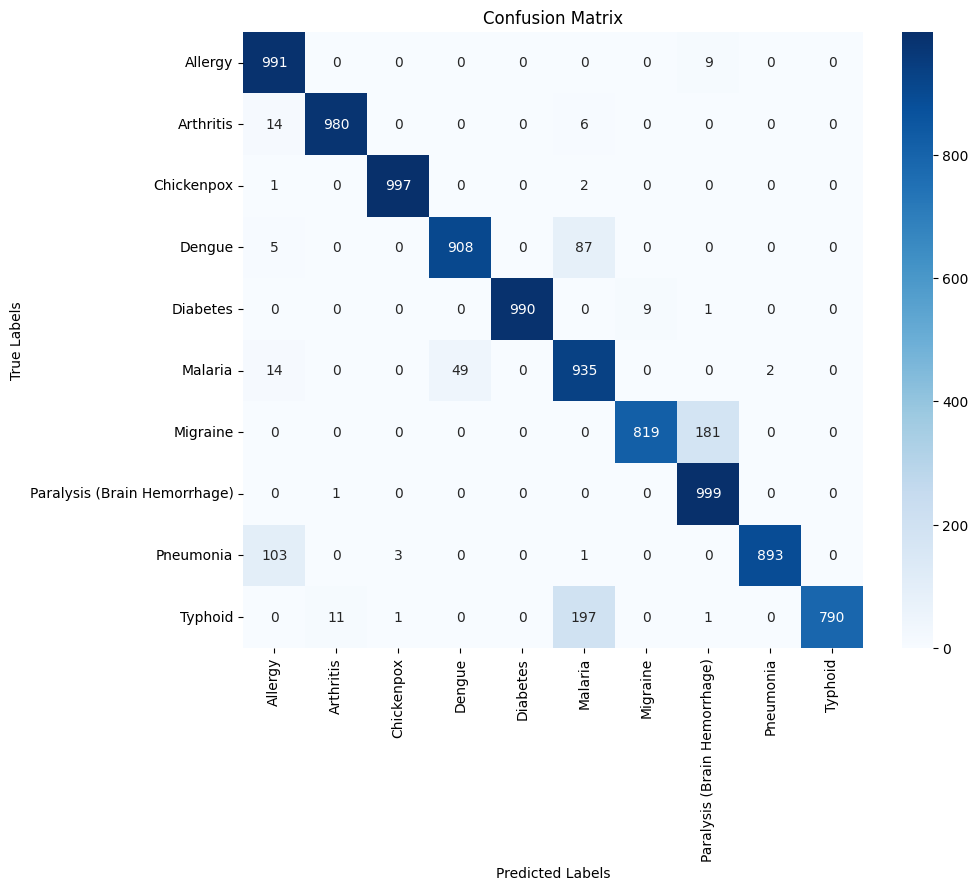

Confusion matrix plot saved as: /content/drive/MyDrive/FYP/Test Datasets/Mayo Clinic/confusion_matrix.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model


# Assuming that you have preprocessed X_new_scaled and y_new_encoded from the previous step
# Make predictions using the trained model
predictions = model.predict(X_new_scaled)
predicted_labels = np.argmax(predictions, axis=1)

# Compute accuracy score on the new data
test_accuracy = accuracy_score(y_new_encoded, predicted_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")  # Print test accuracy

# Generate classification report (CF) and convert it to a DataFrame
report = classification_report(y_new_encoded, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Save the classification report as a CSV file
report_csv_path = direc + "Mayo Clinic/classification_report.csv"
report_df.to_csv(report_csv_path, index=True)
print(f"Classification report saved as: {report_csv_path}")

# Compute the confusion matrix (CM)
cm = confusion_matrix(y_new_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot as a PNG file
cm_png_path = direc + "Mayo Clinic/confusion_matrix.png"
plt.savefig(cm_png_path)
plt.show()
print(f"Confusion matrix plot saved as: {cm_png_path}")
